In [21]:
import pandas as pd
import networkx as nx
from datetime import datetime

data = pd.read_csv("../data/every_map.csv")

# Convert date strings to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Reference date
# reference_date = datetime(2025, 4, 13)
reference_date = datetime(2025, 4, 13)
# Create a directed graph
G = nx.DiGraph()

# Process each row to create weighted edges from loser to winner
for _, row in data.iterrows():
    date = row['Date']
    days_since = (reference_date - date).days
    if days_since > 180 or days_since < 0:
        continue
    weight = 1-(days_since/180)**3

    # Determine winner and loser
    if row['Team1_Score'] > row['Team2_Score']:
        winner = row['Team1_Name']
        loser = row['Team2_Name']
    else:
        winner = row['Team2_Name']
        loser = row['Team1_Name']

    # Add edge with calculated weight
    if G.has_edge(loser, winner):
        G[loser][winner]['weight'] += weight
    else:
        G.add_edge(loser, winner, weight=weight)

# Run PageRank using edge weights
pagerank_scores = nx.pagerank(G, weight='weight')

# Print results
print("PageRank Scores:")
for team, score in sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{team}: {score:.4f}")

PageRank Scores:
Vitality: 0.0722
MOUZ: 0.0721
Spirit: 0.0713
Eternal Fire: 0.0647
FaZe: 0.0567
G2: 0.0542
Falcons: 0.0509
The MongolZ: 0.0490
3DMAX: 0.0364
GamerLegion: 0.0361
Natus Vincere: 0.0331
paiN: 0.0322
Virtus.pro: 0.0320
Liquid: 0.0316
Astralis: 0.0312
FURIA: 0.0285
MIBR: 0.0219
Complexity: 0.0192
HEROIC: 0.0186
SAW: 0.0164
BIG: 0.0149
TYLOO: 0.0135
FlyQuest: 0.0119
M80: 0.0115
Wildcard: 0.0113
Aurora: 0.0111
Apogee: 0.0083
BetBoom: 0.0082
Nemiga: 0.0080
Legacy: 0.0072
NRG: 0.0067
Rare Atom: 0.0065
Passion UA: 0.0053
Lynn Vision: 0.0050
B8: 0.0049
Imperial: 0.0042
Cloud9: 0.0037
fnatic: 0.0036
The Huns: 0.0033
Mindfreak: 0.0033
Housebets: 0.0033
Imperial Valkyries: 0.0033
Fluxo: 0.0033
Metizport: 0.0033
ENCE: 0.0033
9 Pandas: 0.0033


In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import networkx as nx

def visualize_graph_pagerank(G, pagerank_scores):
    # Positioning
    pos = nx.fruchterman_reingold_layout(G, k=1.2, seed=42)

    # Node size: scale PageRank scores to a reasonable range for plotting
    min_size = 200
    max_size = 1200
    pr_values = list(pagerank_scores.values())
    min_pr, max_pr = min(pr_values), max(pr_values)

    def scale(size):
        return min_size + (max_size - min_size) * (size - min_pr) / (max_pr - min_pr + 1e-8)

    node_sizes_dict = {n: scale(pagerank_scores[n])/50 for n in G.nodes}
    print(node_sizes_dict)
    # Node color: based on win percentage (default to 0 if missing)
    cmap = plt.cm.cool
    # norm = PowerNorm(gamma=0.7, vmin=0, vmax=1)
    norm = Normalize(vmin=min_pr, vmax=max_pr)
    node_colors_dict = {n: cmap(norm(pagerank_scores[n])) for n in G.nodes}

    # Plot
    fig, ax = plt.subplots(figsize=(15,15))
    # Edges
    nx.draw_networkx_edges(G, pos, edge_color='lightgray', alpha=0.4, arrows=False, ax=ax)

    # Nodes
    nx.draw_networkx_nodes(
        G, pos,
        node_size=0,
        alpha=0.9,
        ax=ax
    )
    nx.draw_networkx_labels(G, pos, font_size=node_sizes_dict, font_color=node_colors_dict, ax=ax)


    # Colorbar
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    # plt.colorbar(sm, ax=ax, label="Win Percentage", shrink=0.6)

    plt.axis("off")
    plt.tight_layout()
    plt.show()


{'G2': 18.77118867059663, 'Falcons': 17.822769456790578, 'Complexity': 8.638679039984218, 'FaZe': 19.500972256749336, 'Virtus.pro': 12.349060753086682, 'Aurora': 6.261036016970005, '3DMAX': 13.610094635791128, 'GamerLegion': 13.530092413373541, 'The MongolZ': 17.272044923276198, 'Apogee': 5.462904988029575, 'Astralis': 12.119519138137774, 'FURIA': 11.33394898601997, 'Rare Atom': 4.937447322530006, 'Legacy': 5.151096791965094, 'Liquid': 12.223537081378911, 'paiN': 12.390998124655916, 'MOUZ': 23.969838260707494, 'Vitality': 23.999997097533452, 'Spirit': 23.73606988553197, 'Eternal Fire': 21.844739108447893, 'Natus Vincere': 12.671577946880355, 'M80': 6.396121112636533, 'Imperial': 4.263118096564115, 'The Huns': 4.0, 'SAW': 7.826660286109047, 'MIBR': 9.40626171443254, 'TYLOO': 6.967846994586396, 'Nemiga': 5.362971371431717, 'FlyQuest': 6.515118759637519, 'NRG': 5.00514069670988, 'Lynn Vision': 4.492971650408869, 'HEROIC': 8.46559551581468, 'Mindfreak': 4.0, 'Housebets': 4.0, 'BIG': 7.3799

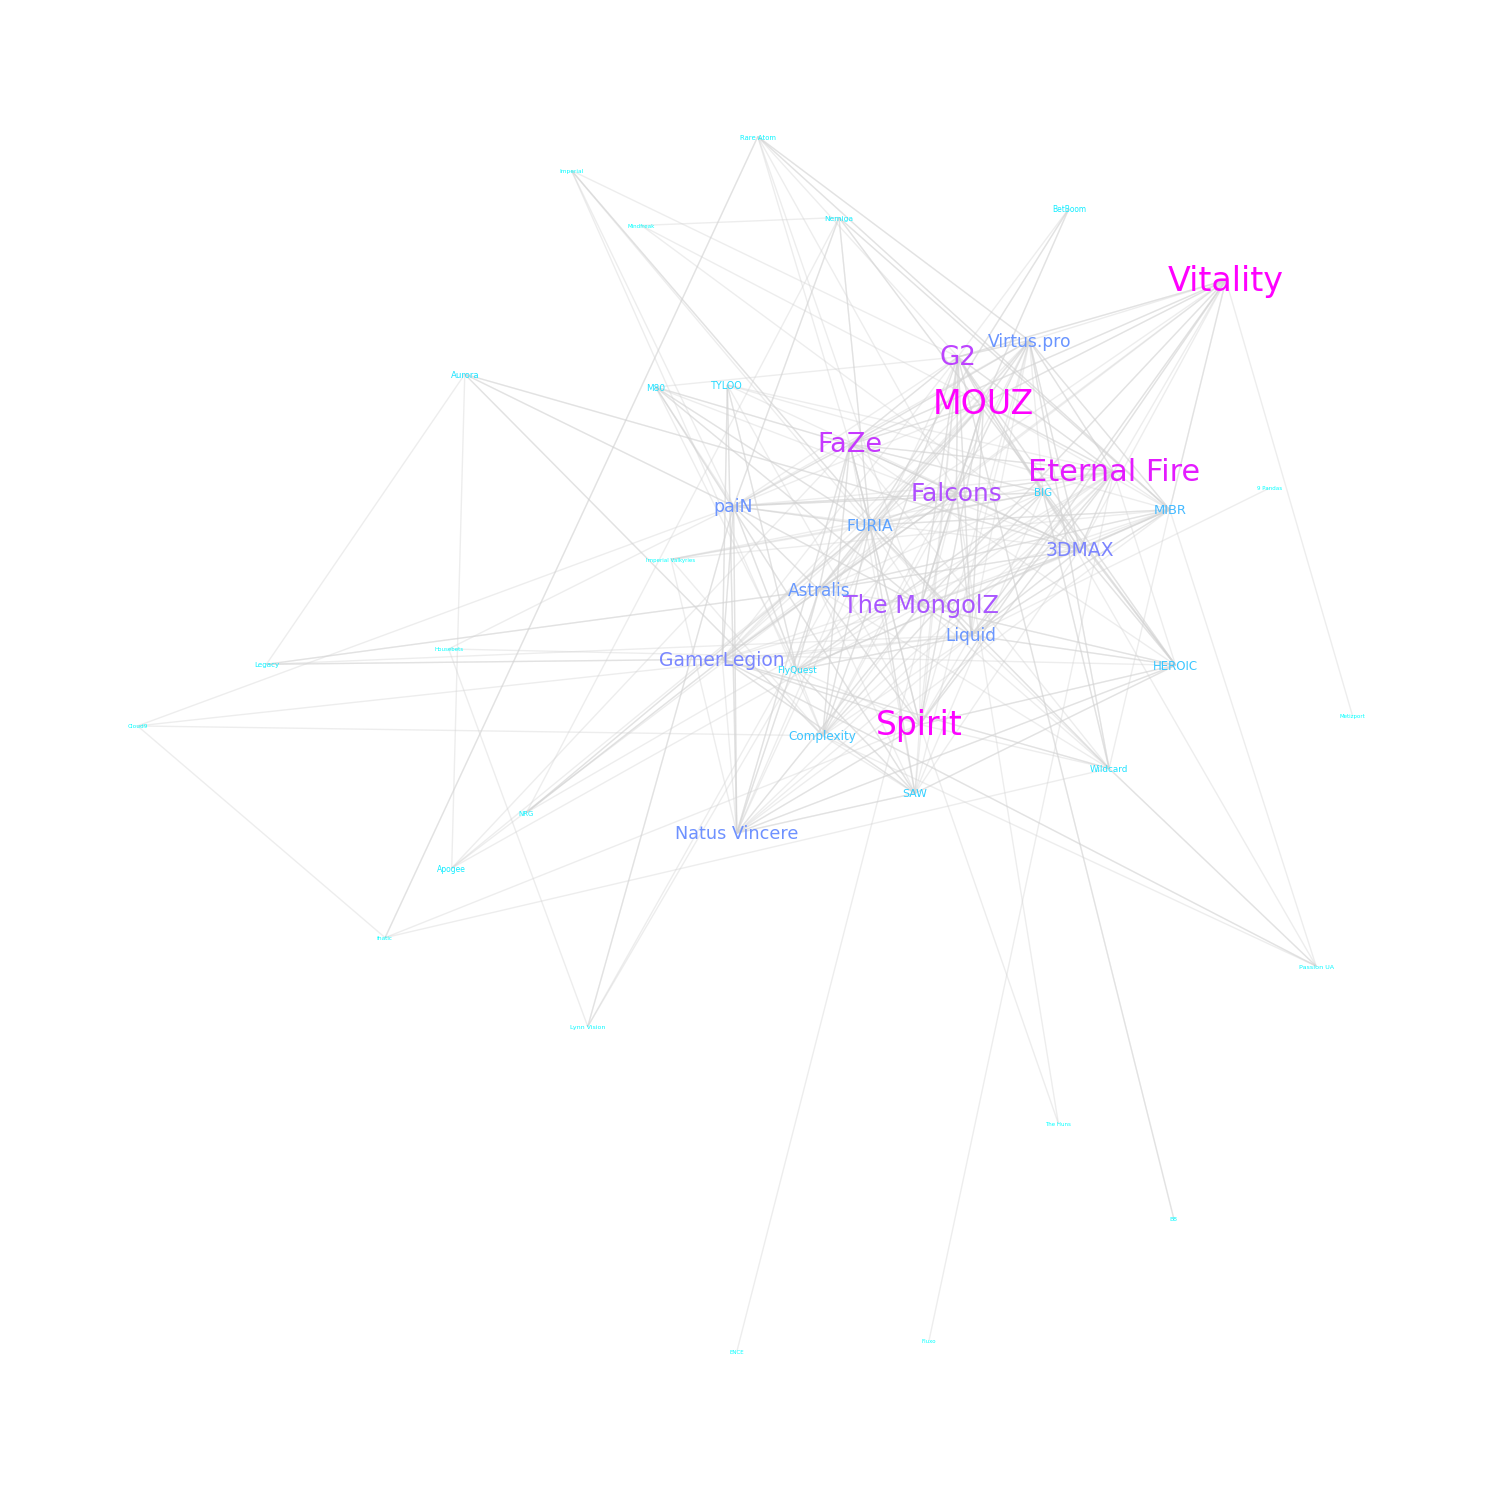

In [43]:
visualize_graph_pagerank(G, pagerank_scores)